In [2]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


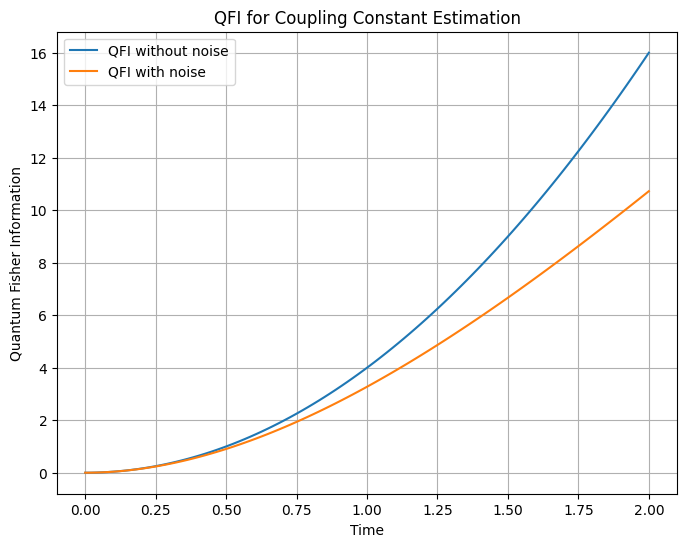

In [2]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Define Pauli matrices
sigmax = qt.sigmax()
sigmay = qt.sigmay()
sigmaz = qt.sigmaz()

# Tensor product for two spins
sx1_sx2 = qt.tensor(sigmax, sigmax)
sz1_sz2 = qt.tensor(sigmaz, sigmaz)

# Effective Hamiltonian: H_bar = (lambda/2) * (sx1_sx2 + sz1_sz2)
lambda_val = 1.0  # Coupling constant
H_bar = (lambda_val / 2) * (sx1_sx2 + sz1_sz2)

# Initial state: (1/sqrt(2)) * (|up up> + |down down>)
up = qt.basis(2, 0)
down = qt.basis(2, 1)
psi0 = (qt.tensor(up, up) + qt.tensor(down, down)).unit()

# Time evolution
tlist = np.linspace(0, 2, 100)
result = qt.mesolve(H_bar, psi0, tlist)

# Compute QFI
def compute_qfi(psi_t, t, lambda_val):
    theta = 2 * lambda_val * t
    dtheta_dlambda = 2 * t
    return (dtheta_dlambda)**2

# Simulate QFI with and without noise
noise_factor = np.exp(-0.1 * tlist)  # Example noise: exponential decay
qfi = [compute_qfi(result.states[i], tlist[i], lambda_val) for i in range(len(tlist))]
qfi_noise = [q * (noise_factor[i])**2 for i, q in enumerate(qfi)]

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(tlist, qfi, label="QFI without noise")
plt.plot(tlist, qfi_noise, label="QFI with noise")
plt.xlabel("Time")
plt.ylabel("Quantum Fisher Information")
plt.title("QFI for Coupling Constant Estimation")
plt.legend()
plt.grid(True)
plt.savefig("qfi_spin_chain.png")